## Stock Clustering in K-Means

In [2]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Creating dataframe with price of 30 different stocks

In [39]:
path = "data/Small Cap"
filenames = glob.glob(path + "/*.csv")
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

stocks = pd.DataFrame()
for df in dfs:
    stocks[df["Symbol"][0]] = df["Close Price"]

In [40]:
stocks.head()

,BAJAJELEC,BOMDYEING,CENTURYPLY,IDFC,JETAIRWAYS,NCC,PVR,RAYMOND,VIPIND,WELSPUNIND
0,341.15,82.20,266.65,63.70,527.50,97.35,1524.95,772.80,199.20,90.25
1,347.00,83.40,266.10,64.25,534.15,100.40,1539.00,785.00,200.90,90.65
2,349.85,82.25,264.85,63.35,528.90,101.45,1530.30,783.65,199.65,88.85
3,334.10,78.95,260.35,61.50,522.70,97.00,1515.05,746.95,193.30,86.90
4,336.20,77.15,254.05,61.15,520.40,95.45,1513.55,723.10,195.95,85.05


In [41]:
path = "data/Mid Cap"
filenames = glob.glob(path + "/*.csv")
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

for df in dfs:
    stocks[df["Symbol"][0]] = df["Close Price"]

In [44]:
stocks.head()

,BAJAJELEC,BOMDYEING,CENTURYPLY,IDFC,JETAIRWAYS,NCC,PVR,RAYMOND,VIPIND,WELSPUNIND,ADANIPOWER,CASTROLIND,DHFL,EXIDEIND,MINDTREE,RBLBANK,RELINFRA,SUNTV,TATAPOWER,VOLTAS
0,341.15,82.20,266.65,63.70,527.50,97.35,1524.95,772.80,199.20,90.25,30.25,449.85,431.4,245.80,509.45,563.90,605.40,912.20,83.55,431.85
1,347.00,83.40,266.10,64.25,534.15,100.40,1539.00,785.00,200.90,90.65,32.85,443.00,1009.9,244.70,511.30,562.60,611.05,894.70,83.85,432.45
2,349.85,82.25,264.85,63.35,528.90,101.45,1530.30,783.65,199.65,88.85,33.10,439.55,1055.2,243.20,506.35,564.25,605.25,887.05,85.35,430.20
3,334.10,78.95,260.35,61.50,522.70,97.00,1515.05,746.95,193.30,86.90,31.90,433.95,1070.0,239.85,492.90,552.15,578.65,871.35,83.75,414.10
4,336.20,77.15,254.05,61.15,520.40,95.45,1513.55,723.10,195.95,85.05,32.40,437.10,1050.0,238.15,497.50,555.45,569.55,852.40,84.15,415.75


In [45]:
path = "data/Large Cap"
filenames = glob.glob(path + "/*.csv")
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

for df in dfs:
    stocks[df["Symbol"][0]] = df["Close Price"]

In [48]:
stocks.head()

,BAJAJELEC,BOMDYEING,CENTURYPLY,IDFC,JETAIRWAYS,NCC,PVR,RAYMOND,VIPIND,WELSPUNIND,...,AXISBANK,CIPLA,HDFCBANK,HINDUNILVR,INFRATEL,INFY,ITC,LT,RELIANCE,TCS
0,341.15,82.20,266.65,63.70,527.50,97.35,1524.95,772.80,199.20,90.25,...,500.1,569.00,1553.40,983.25,371.05,951.55,277.95,1742.40,1344.10,2365.10
1,347.00,83.40,266.10,64.25,534.15,100.40,1539.00,785.00,200.90,90.65,...,501.5,565.60,1583.00,1000.40,376.55,955.00,283.45,1740.70,1356.30,2429.15
2,349.85,82.25,264.85,63.35,528.90,101.45,1530.30,783.65,199.65,88.85,...,502.8,562.35,1559.65,1009.40,389.90,952.80,281.65,1755.45,1353.10,2455.35
3,334.10,78.95,260.35,61.50,522.70,97.00,1515.05,746.95,193.30,86.90,...,492.0,560.10,1557.15,990.25,378.90,961.75,277.90,1722.60,1327.35,2536.20
4,336.20,77.15,254.05,61.15,520.40,95.45,1513.55,723.10,195.95,85.05,...,501.7,564.95,1600.00,1008.00,378.95,957.95,286.20,1724.55,1318.85,2507.15


In [90]:
returns = stocks.pct_change()
returns.head()

,BAJAJELEC,BOMDYEING,CENTURYPLY,IDFC,JETAIRWAYS,NCC,PVR,RAYMOND,VIPIND,WELSPUNIND,...,AXISBANK,CIPLA,HDFCBANK,HINDUNILVR,INFRATEL,INFY,ITC,LT,RELIANCE,TCS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.017148,0.014599,-0.002063,0.008634,0.012607,0.031330,0.009213,0.015787,0.008534,0.004432,...,0.002799,-0.005975,0.019055,0.017442,0.014823,0.003626,0.019788,-0.000976,0.009077,0.027081
2,0.008213,-0.013789,-0.004697,-0.014008,-0.009829,0.010458,-0.005653,-0.001720,-0.006222,-0.019857,...,0.002592,-0.005746,-0.014750,0.008996,0.035453,-0.002304,-0.006350,0.008474,-0.002359,0.010786
3,-0.045019,-0.040122,-0.016991,-0.029203,-0.011722,-0.043864,-0.009965,-0.046832,-0.031806,-0.021947,...,-0.021480,-0.004001,-0.001603,-0.018972,-0.028212,0.009393,-0.013314,-0.018713,-0.019030,0.032928
4,0.006286,-0.022799,-0.024198,-0.005691,-0.004400,-0.015979,-0.000990,-0.031930,0.013709,-0.021289,...,0.019715,0.008659,0.027518,0.017925,0.000132,-0.003951,0.029867,0.001132,-0.006404,-0.011454


In [68]:
ann_ret = returns.mean()*252*100
print("STOCK          Annual Return %\n")
print(ann_ret)

STOCK          Annual Return %

BAJAJELEC       31.605318
BOMDYEING       32.762148
CENTURYPLY     -18.233834
IDFC           -20.048904
JETAIRWAYS     -48.101880
NCC              7.714186
PVR             10.853008
RAYMOND          7.002052
VIPIND          47.966397
WELSPUNIND     -20.805802
ADANIPOWER      30.527262
CASTROLIND     -43.455745
DHFL          2785.158723
EXIDEIND        -5.148401
MINDTREE        39.256977
RBLBANK         11.349668
RELINFRA       -75.007376
SUNTV          -20.570430
TATAPOWER       -9.094974
VOLTAS          19.103016
AXISBANK        23.524575
CIPLA            2.197553
HDFCBANK        16.687232
HINDUNILVR      29.497061
INFRATEL       -12.418651
INFY            -2.267179
ITC              6.401437
LT              -8.590369
RELIANCE         9.512101
TCS              8.046956
dtype: float64


In [69]:
ann_vol = returns.std()*np.sqrt(252)*100
print("STOCK          Annual Volatility %\n")
print(ann_vol)

STOCK          Annual Volatility %

BAJAJELEC      40.241355
BOMDYEING      60.286945
CENTURYPLY     37.526871
IDFC           35.398952
JETAIRWAYS     62.485368
NCC            44.139329
PVR            31.019078
RAYMOND        36.383449
VIPIND         43.206910
WELSPUNIND     39.907054
ADANIPOWER     61.053220
CASTROLIND     44.646585
DHFL          842.419659
EXIDEIND       26.298513
MINDTREE       34.148514
RBLBANK        25.873220
RELINFRA       54.757563
SUNTV          36.541396
TATAPOWER      30.829677
VOLTAS         30.834649
AXISBANK       27.789564
CIPLA          25.418277
HDFCBANK       25.682114
HINDUNILVR     19.396979
INFRATEL       30.602300
INFY           41.896335
ITC            22.386344
LT             31.432282
RELIANCE       43.909085
TCS            43.138713
dtype: float64


In [94]:
annual = pd.DataFrame()
annual["Return"] = returns.mean()*252
annual["Volatility"] = returns.std() * np.sqrt(252)
annual

,Return,Volatility
BAJAJELEC,0.316053,0.402414
BOMDYEING,0.327621,0.602869
CENTURYPLY,-0.182338,0.375269
IDFC,-0.200489,0.353990
JETAIRWAYS,-0.481019,0.624854
NCC,0.077142,0.441393
PVR,0.108530,0.310191
RAYMOND,0.070021,0.363834
VIPIND,0.479664,0.432069
WELSPUNIND,-0.208058,0.399071


### Optimal Clusters using Elbow Curve

Text(0.5, 1.0, 'Elbow curve')

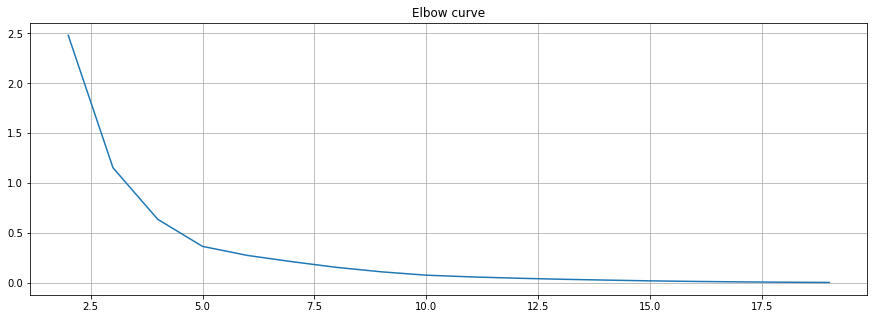

In [98]:
from sklearn.cluster import KMeans

data = np.asarray([np.asarray(annual['Return']),np.asarray(annual['Volatility'])]).T

X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

### K-Means Clustering with K = 5

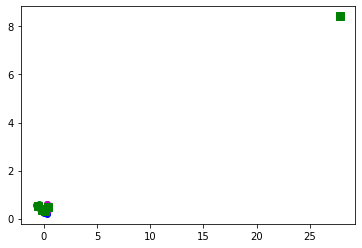

In [101]:
from pylab import plot,show
from scipy.cluster.vq import kmeans,vq

# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [105]:
# Finding the outlier

print(annual.idxmax())

Return        DHFL
Volatility    DHFL
dtype: object


In [112]:
annual.drop("DHFL", inplace=True)

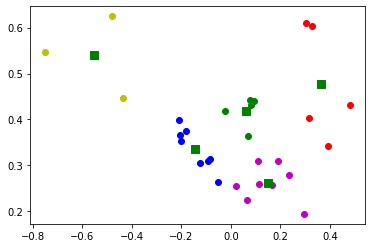

In [116]:
data = np.asarray([np.asarray(annual['Return']),np.asarray(annual['Volatility'])]).T

# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()